In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive/')
%cd /content/gdrive/MyDrive/MLproject

Mounted at /content/gdrive/
/content/gdrive/MyDrive/MLproject


In [2]:
!ls

 BHARTIARTL.csv   'ML project Note Book.pdf'   Untitled1.ipynb
 CIPLA.csv	  'ML project phase2.docx'     Untitled2.ipynb
 DRREDDY.csv	  'Untitled0 (1).ipynb'
 mlproject.ipynb   Untitled0.ipynb


In [3]:
pip install fastai

In [4]:
import csv
import fastai
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas.plotting import scatter_matrix 
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from fastai.tabular import add_datepart
from sklearn.linear_model import LinearRegression

In [5]:
df=pd.read_csv('CIPLA.csv')
df = pd.DataFrame(df)
df

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,CIPLA,EQ,1349.40,1410.00,1457.35,1380.05,1457.35,1457.35,1441.36,21060,3.035496e+12,NaN,NaN,NaN
1,2000-01-04,CIPLA,EQ,1457.35,1537.00,1537.00,1430.00,1466.05,1465.25,1460.43,30215,4.412698e+12,NaN,NaN,NaN
2,2000-01-05,CIPLA,EQ,1465.25,1474.00,1474.00,1365.00,1441.00,1435.05,1428.11,33799,4.826872e+12,NaN,NaN,NaN
3,2000-01-06,CIPLA,EQ,1435.05,1434.00,1435.00,1349.00,1365.00,1355.85,1390.55,33083,4.600356e+12,NaN,NaN,NaN
4,2000-01-07,CIPLA,EQ,1355.85,1370.00,1389.90,1247.40,1247.40,1247.55,1267.49,66536,8.433351e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,CIPLA,EQ,935.60,935.60,940.00,902.15,907.95,905.40,914.11,10255697,9.374885e+14,161321.0,3451318.0,0.3365
5302,2021-04-27,CIPLA,EQ,905.40,913.00,919.50,901.00,911.20,912.40,909.22,5669049,5.154420e+14,120188.0,1126288.0,0.1987
5303,2021-04-28,CIPLA,EQ,912.40,914.35,918.00,902.95,906.25,910.20,909.94,7251009,6.597970e+14,134413.0,1772739.0,0.2445
5304,2021-04-29,CIPLA,EQ,910.20,911.95,917.40,904.00,906.00,906.50,910.22,4953091,4.508421e+14,88604.0,1122534.0,0.2266


In [6]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d') 
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close','Open','High','Volume'])

new_data['Date'] = df['Date'].values
new_data['Close'] = df['Close'].values
new_data['Open'] = df['Open'].values
new_data['High'] = df['High'].values
new_data['Volume'] = df['Volume'].values

#breaking date
add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/fastai/tabular/transform.py:63: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  for n in attr: df[prefix + n] = getattr(field.dt, n.lower())


In [7]:
new_data

,Close,Open,High,Volume,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start
0,1457.35,1410.00,1457.35,21060,2000,1,1,3,0,3,False,False,False,False,False,False
1,1465.25,1537.00,1537.00,30215,2000,1,1,4,1,4,False,False,False,False,False,False
2,1435.05,1474.00,1474.00,33799,2000,1,1,5,2,5,False,False,False,False,False,False
3,1355.85,1434.00,1435.00,33083,2000,1,1,6,3,6,False,False,False,False,False,False
4,1247.55,1370.00,1389.90,66536,2000,1,1,7,4,7,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,905.40,935.60,940.00,10255697,2021,4,17,26,0,116,False,False,False,False,False,False
5302,912.40,913.00,919.50,5669049,2021,4,17,27,1,117,False,False,False,False,False,False
5303,910.20,914.35,918.00,7251009,2021,4,17,28,2,118,False,False,False,False,False,False
5304,906.50,911.95,917.40,4953091,2021,4,17,29,3,119,False,False,False,False,False,False


In [8]:
n = len(new_data)
sev = int(0.7 * n)
train = new_data[:sev]
valid = new_data[sev:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

In [9]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [19]:
scaler = MinMaxScaler(feature_range=(0, 1))
scal = scaler.fit_transform(new_data)

new_data = pd.DataFrame(scal,index=range(0,len(df)),columns=new_data.columns)

n = len(new_data)
sev = int(0.70 * n)
train = new_data[:sev]
test = new_data[sev:]

pred = ['Close']
x_train = train.drop(pred, axis=1)
y_train = train[pred]
x_test = test.drop(pred, axis=1)
y_test = test[pred]

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


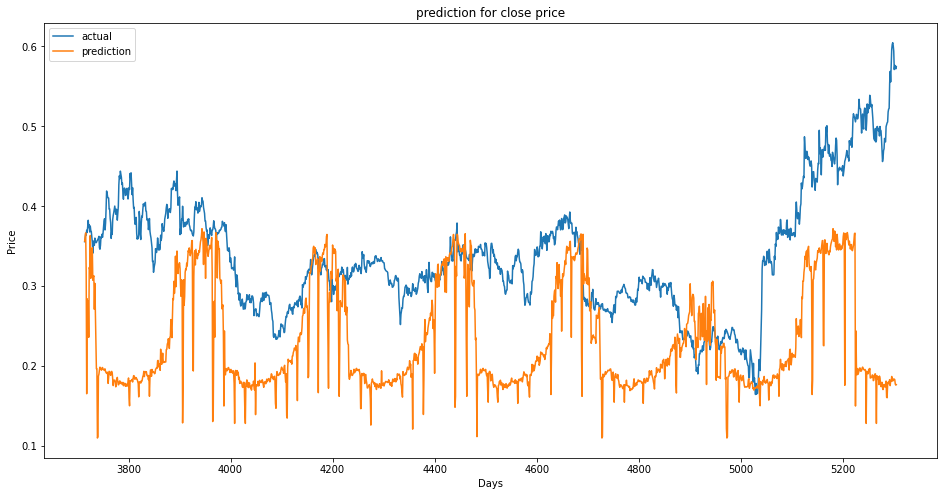

In [28]:
plt.figure(figsize=(16,8))

test['Predictions'] = preds
plt.plot(test['Close'],label = 'actual')
plt.plot(test['Predictions'],label = 'prediction')

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('prediction for close price')
plt.legend()
plt.show()

In [20]:
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))

In [21]:
rms

608.0390838463006